In [2]:
pip install  fredapi

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

In [4]:
api_file = "C:/Users/lenyn/OneDrive/Desktop/PortfolioProjects/Economic_Data_Analysis_Project/Fred_API_Key.txt"
with open(api_file, 'r') as file: 
    fred_key = file.read()

# 1. Create The Fred Object 

In [5]:
fred = Fred(api_key=fred_key)
fred

# 2. Search for Economic Data

In [6]:
sp_search = fred.search('S&P', order_by='popularity')

In [7]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2025-10-26   2025-10-26   
SP500                    SP500     2025-10-26   2025-10-26   
CSUSHPINSA          CSUSHPINSA     2025-10-26   2025-10-26   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2025-10-26   2025-10-26   
BAMLC0A0CM          BAMLC0A0CM     2025-10-26   2025-10-26   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
SP500                                                     S&P 500   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2025-10-23  Daily, Close   
SP500                 2015-10-26      2025-10-24  Daily, Close   
CSUSHPINSA            1987-01-01      2025-07-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2025-10-23  Daily, Close   
BAMLC0A0CM            1996-12-31      2025-10-23  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
SP500                        D               Index               Index   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2025-10-24 09:11:52-05:00         99   
SP500           2025-10-24 19:01:58-05:00         92   
CSUSHPINSA      2025-09-30 08:11:02-05:00         86   
BAMLH0A0HYM2EY  2025-10-24 09:11:56-05:00         86   
BAMLC0A0CM      2025-10-24 09:13:04-05:00         86   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
SP500           The observations for the S&P 500 represent the...  
CSUSHPINSA      For more information regarding the index, plea...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

# 3. Pull Raw Data with Plotting

In [8]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

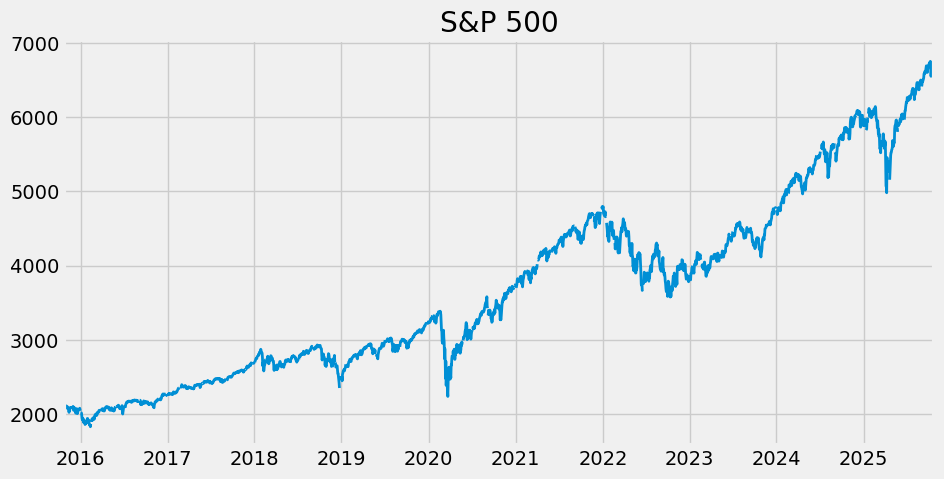

In [9]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [10]:
uemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]
uemp_df

id realtime_start realtime_end  \
series id                                                                
UNRATE                              UNRATE     2025-10-26   2025-10-26   
LNS14000006                    LNS14000006     2025-10-26   2025-10-26   
LNS14000024                    LNS14000024     2025-10-26   2025-10-26   
CAUR                                  CAUR     2025-10-26   2025-10-26   
LNS14024887                    LNS14024887     2025-10-26   2025-10-26   
NYUR                                  NYUR     2025-10-26   2025-10-26   
U2RATE                              U2RATE     2025-10-26   2025-10-26   
TXUR                                  TXUR     2025-10-26   2025-10-26   
M0892AUSM156SNBR          M0892AUSM156SNBR     2025-10-26   2025-10-26   
LNS14000002                    LNS14000002     2025-10-26   2025-10-26   
FLUR                                  FLUR     2025-10-26   2025-10-26   
M0892BUSM156SNBR          M0892BUSM156SNBR     2025-10-26   2025-10-26   
LNS14000003                    LNS14000003     2025-10-26   2025-10-26   
LNS14027662                    LNS14027662     2025-10-26   2025-10-26   
LNS14027660                    LNS14027660     2025-10-26   2025-10-26   
LNS14000009                    LNS14000009     2025-10-26   2025-10-26   
ALUR                                  ALUR     2025-10-26   2025-10-26   
LNS14000001                    LNS14000001     2025-10-26   2025-10-26   
LNS14000036                    LNS14000036     2025-10-26   2025-10-26   
ILUR                                  ILUR     2025-10-26   2025-10-26   
LNS14000012                    LNS14000012     2025-10-26   2025-10-26   
VAUR                                  VAUR     2025-10-26   2025-10-26   
MIUR                                  MIUR     2025-10-26   2025-10-26   
LNS14000031                    LNS14000031     2025-10-26   2025-10-26   
MAUR                                  MAUR     2025-10-26   2025-10-26   
GAUR                                  GAUR     2025-10-26   2025-10-26   
OHUR                                  OHUR     2025-10-26   2025-10-26   
PAUR                                  PAUR     2025-10-26   2025-10-26   
NCUR                                  NCUR     2025-10-26   2025-10-26   
LNS14027659                    LNS14027659     2025-10-26   2025-10-26   
LNS14000060                    LNS14000060     2025-10-26   2025-10-26   
WAUR                                  WAUR     2025-10-26   2025-10-26   
WIUR                                  WIUR     2025-10-26   2025-10-26   
LASMT261982000000003  LASMT261982000000003     2025-10-26   2025-10-26   
DCUR                                  DCUR     2025-10-26   2025-10-26   
NJUR                                  NJUR     2025-10-26   2025-10-26   
ORUR                                  ORUR     2025-10-26   2025-10-26   
NVUR                                  NVUR     2025-10-26   2025-10-26   
KYUR                                  KYUR     2025-10-26   2025-10-26   
LAUR                                  LAUR     2025-10-26   2025-10-26   
PRUR                                  PRUR     2025-10-26   2025-10-26   
LNS14032183                    LNS14032183     2025-10-26   2025-10-26   
COUR                                  COUR     2025-10-26   2025-10-26   
AZUR                                  AZUR     2025-10-26   2025-10-26   
TNUR                                  TNUR     2025-10-26   2025-10-26   
MNUR                                  MNUR     2025-10-26   2025-10-26   
WVUR                                  WVUR     2025-10-26   2025-10-26   
LASMT534266000000003  LASMT534266000000003     2025-10-26   2025-10-26   
HIUR                                  HIUR     2025-10-26   2025-10-26   
MSUR                                  MSUR     2025-10-26   2025-10-26   
MDUR                                  MDUR     2025-10-26   2025-10-26   
LNS14000032                    LNS14000032     2025-10-26   2025-10-26   
IAUR                                  IAUR  

In [11]:
all_results = []

for myid in uemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

uemp_results = pd.concat(all_results, axis = 1)

In [12]:
uemp_states = uemp_results.drop('UNRATE', axis=1)

<Axes: >

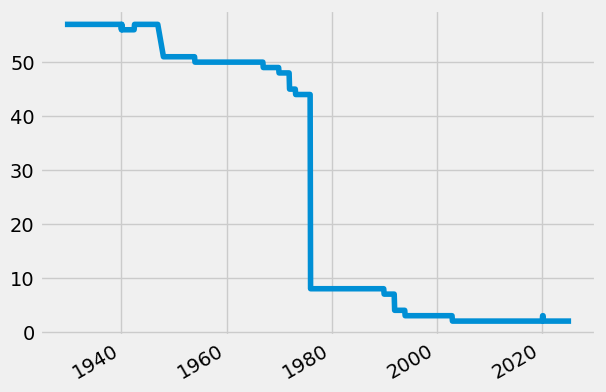

In [13]:
uemp_states.isna().sum(axis = 1).plot()

In [14]:
extra_cols = []
for cols in uemp_states.columns:
    if len(cols) > 4:
        extra_cols.append(cols)

extra_cols

['LNS14000006',
 'LNS14000024',
 'LNS14024887',
 'U2RATE',
 'M0892AUSM156SNBR',
 'LNS14000002',
 'M0892BUSM156SNBR',
 'LNS14000003',
 'LNS14027662',
 'LNS14027660',
 'LNS14000009',
 'LNS14000001',
 'LNS14000036',
 'LNS14000012',
 'LNS14000031',
 'LNS14027659',
 'LNS14000060',
 'LASMT261982000000003',
 'LNS14032183',
 'LASMT534266000000003',
 'LNS14000032',
 'LRUN64TTUSM156S']

In [15]:
uemp_states = uemp_states.drop(extra_cols, axis = 1)

In [16]:
uemp_states = uemp_states.dropna()

In [28]:
uemp_states

California  New York  Texas  Florida  Alabama  Illinois  Virginia  \
1976-01-01         9.2      10.3    5.8      9.6      6.7       6.6       6.0   
1976-02-01         9.2      10.3    5.8      9.7      6.6       6.6       6.0   
1976-03-01         9.1      10.2    5.9      9.6      6.6       6.6       6.0   
1976-04-01         9.0      10.2    5.9      9.5      6.5       6.6       5.9   
1976-05-01         8.9      10.2    6.0      9.3      6.4       6.6       5.8   
...                ...       ...    ...      ...      ...       ...       ...   
2025-04-01         5.3       4.2    4.1      3.7      3.3       4.8       3.3   
2025-05-01         5.3       4.0    4.1      3.7      3.3       4.8       3.4   
2025-06-01         5.4       4.0    4.0      3.7      3.2       4.6       3.5   
2025-07-01         5.5       4.0    4.0      3.7      3.0       4.6       3.6   
2025-08-01         5.5       4.0    4.1      3.8      2.9       4.4       3.6   

            Michigan  Massachusetts  Georgia  Ohio  Pennsylvania  \
1976-01-01       9.9           10.6      8.4   8.1           8.1   
1976-02-01       9.9           10.6      8.4   8.1           8.1   
1976-03-01       9.9           10.6      8.3   8.1           8.1   
1976-04-01       9.8           10.4      8.2   7.9           8.1   
1976-05-01       9.6           10.1      8.1   7.8           8.1   
...              ...            ...      ...   ...           ...   
2025-04-01       5.5            4.6      3.6   4.9           3.9   
2025-05-01       5.4            4.8      3.5   4.9           3.9   
2025-06-01       5.3            4.8      3.5   4.9           4.0   
2025-07-01       5.3            4.8      3.4   5.0           4.0   
2025-08-01       5.2            4.8      3.4   5.0           4.0   

            North Carolina  Washington  Wisconsin  the District of Columbia  \
1976-01-01             6.5         8.5        5.8                       8.8   
1976-02-01             6.5         8.5        5.8                       8.8   
1976-03-01             6.5         8.5        5.8                       8.7   
1976-04-01             6.3         8.5        5.7                       8.6   
1976-05-01             6.1         8.5        5.6                       8.5   
...                    ...         ...        ...                       ...   
2025-04-01             3.7         4.4        3.3                       5.8   
2025-05-01             3.7         4.5        3.3                       5.9   
2025-06-01             3.7         4.5        3.2                       5.9   
2025-07-01             3.7         4.5        3.1                       6.0   
2025-08-01             3.7         4.5        3.1                       6.0   

            New Jersey  Oregon  Nevada  Kentucky  Louisiana  Puerto Rico  \
1976-01-01        10.2     9.5     9.2       5.6        6.3         19.6   
1976-02-01        10.2     9.5     9.2       5.6        6.3         19.5   
1976-03-01        10.2     9.4     9.2       5.6        6.3         19.3   
1976-04-01        10.3     9.3     9.0       5.6        6.4         19.0   
1976-05-01        10.3     9.1     8.8       5.5        6.5         18.9   
...                ...     ...     ...       ...        ...          ...   
2025-04-01         4.8     4.7     5.6       5.2        4.4          5.5   
2025-05-01         4.8     4.8     5.5       5.0        4.5          5.5   
2025-06-01         4.9     4.9     5.4       4.9        4.5          5.5   
2025-07-01         4.9     4.9     5.4       4.9        4.5          5.5   
2025-08-01         5.0     5.0     5.3       4.7        4.4          5.6   

            Colorado  Arizona  Tennessee  Minnesota  West Virginia  Hawaii  \
1976-01-01       5.8     10.2        6.0        5.9            7.4     9.6   
1976-02-01       5.8     10.2        6.0        5.9            7.4     9.6   
1976-03-01       5.7     10.2        6.0        5.8            7.4     9.6   
1976-04-01       5.6     10.0        6.0        

In [17]:
id_to_state = uemp_df['title'].str.replace('Unemployment Rate in ', '').drop(extra_cols).drop('UNRATE').to_dict()
uemp_states.columns = [id_to_state[val] for val in uemp_states.columns]
id_to_state

{'CAUR': 'California',
 'NYUR': 'New York',
 'TXUR': 'Texas',
 'FLUR': 'Florida',
 'ALUR': 'Alabama',
 'ILUR': 'Illinois',
 'VAUR': 'Virginia',
 'MIUR': 'Michigan',
 'MAUR': 'Massachusetts',
 'GAUR': 'Georgia',
 'OHUR': 'Ohio',
 'PAUR': 'Pennsylvania',
 'NCUR': 'North Carolina',
 'WAUR': 'Washington',
 'WIUR': 'Wisconsin',
 'DCUR': 'the District of Columbia',
 'NJUR': 'New Jersey',
 'ORUR': 'Oregon',
 'NVUR': 'Nevada',
 'KYUR': 'Kentucky',
 'LAUR': 'Louisiana',
 'PRUR': 'Puerto Rico',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'TNUR': 'Tennessee',
 'MNUR': 'Minnesota',
 'WVUR': 'West Virginia',
 'HIUR': 'Hawaii',
 'MSUR': 'Mississippi',
 'MDUR': 'Maryland',
 'IAUR': 'Iowa',
 'MOUR': 'Missouri',
 'NDUR': 'North Dakota',
 'AKUR': 'Alaska',
 'SCUR': 'South Carolina',
 'INUR': 'Indiana'}

In [18]:
# Plot states Unemployment Rate
px.line(uemp_states)

## Pull May 2020 Unemployment Rate Per State

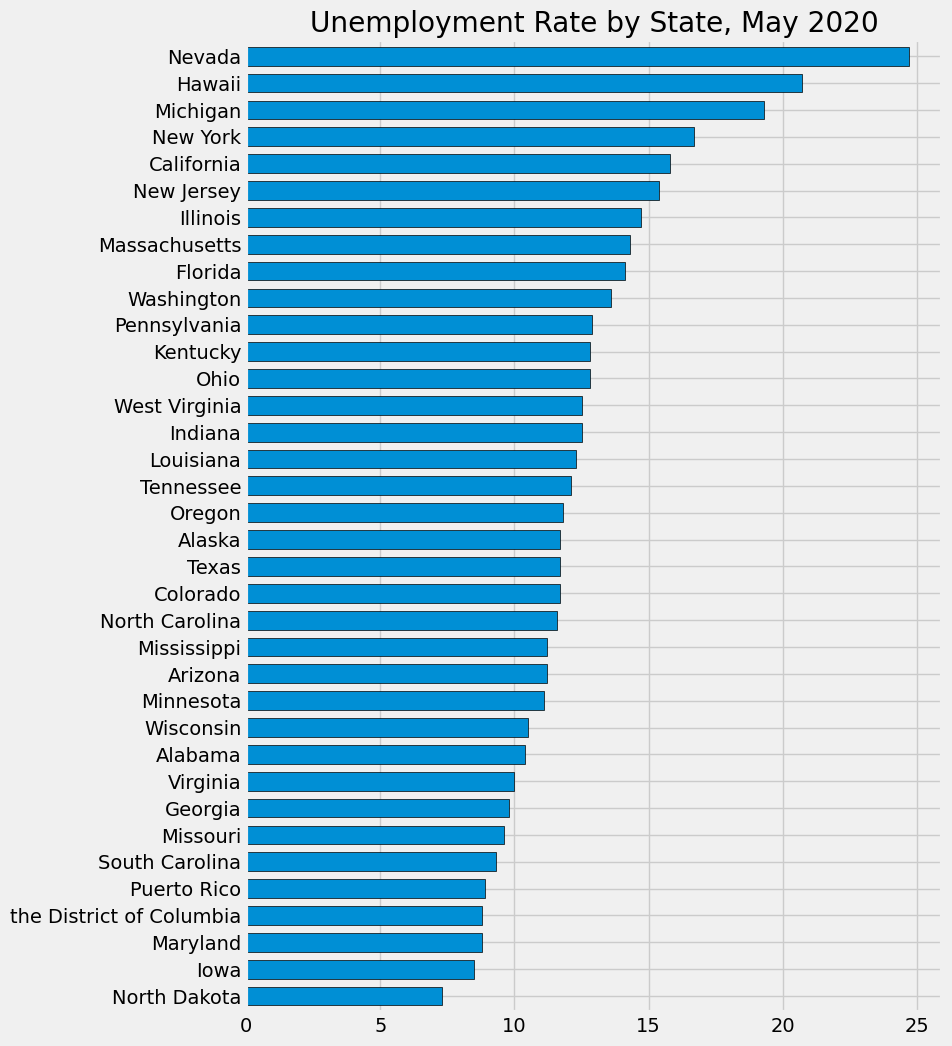

In [19]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize= (8, 12), width = 0.7, edgecolor = 'black', 
          title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [20]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2025-10-26   2025-10-26   
LNS11300060          LNS11300060     2025-10-26   2025-10-26   
LNS11300002          LNS11300002     2025-10-26   2025-10-26   
LNS11300001          LNS11300001     2025-10-26   2025-10-26   
LNS11300012          LNS11300012     2025-10-26   2025-10-26   
...                          ...            ...          ...   
LRIN55FEUSM156S  LRIN55FEUSM156S     2025-10-26   2025-10-26   
EMSHRNQA                EMSHRNQA     2025-10-26   2025-10-26   
EMSHRNLA                EMSHRNLA     2025-10-26   2025-10-26   
EMSHRNLP                EMSHRNLP     2025-10-26   2025-10-26   
EMSHRNQP                EMSHRNQP     2025-10-26   2025-10-26   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11300012            Labor Force Participation Rate - 16-19 Yrs.   
...                                                            ...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
EMSHRNQA         Monthly Share of All U.S. Workers Who Leave th...   
EMSHRNLA         Monthly Share of All U.S. Workers Who Leave th...   
EMSHRNLP         Monthly Share of Prime-Age U.S. Workers Who Le...   
EMSHRNQP         Monthly Share of Prime-Age U.S. Workers Who Le...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2025-08-01   Monthly               M   
LNS11300060            1948-01-01      2025-08-01   Monthly               M   
LNS11300002            1948-01-01      2025-08-01   Monthly               M   
LNS11300001            1948-01-01      2025-08-01   Monthly               M   
LNS11300012            1948-01-01      2025-08-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN55FEUSM156S        1977-01-01      2025-08-01   Monthly               M   
EMSHRNQA               1978-01-01      2025-07-01   Monthly               M   
EMSHRNLA               1978-01-01      2025-07-01   Monthly               M   
EMSHRNLP               1978-01-01      2025-07-01   Monthly               M   
EMSHRNQP               1978-01-01      2025-07-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11300012      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
EMSHRNQA         Percent           %  Seasonally Adjusted   
EMSHRNLA         Percent           %  Seasonally Adjusted   
EMSHRNLP         Percent           %  Seasonally Adjusted   
EMSHRNQP         Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short               last_updated  \
series id                                                              
CIVPART                                SA  2025-09-05 07:51:02-05:00   
LNS11300060                            SA  2025-09-05 07:51:06-05:00   
LNS11300002                            SA  2025-09-05 07:51:10-05:00   
LNS11300001                            SA  2025-09-05 07:51:11-05:00   
LNS11300012                     

In [21]:
extra_cols = [val for val in part_df.index if len(val) > 7]
extra_cols

['LNS11300060',
 'LNS11300002',
 'LNS11300001',
 'LNS11300012',
 'LNS11324230',
 'LRAC25MAUSM156S',
 'LRAC25FEUSM156S',
 'LNS11300036',
 'LNS11300006',
 'LNS11327662',
 'LNS11327660',
 'LNS11300028',
 'LNS11300032',
 'LNS11300009',
 'LNS11300031',
 'LRAC55TTUSM156S',
 'LNS11300003',
 'LNS11300029',
 'LNS11300026',
 'LNS11327659',
 'LNS11300025',
 'LNS11327689',
 'LRAC64TTUSM156S',
 'LNS11300015',
 'LRAC55MAUSM156S',
 'LRAC24FEUSM156S',
 'LRIN64TTUSM156S',
 'LNS11300018',
 'LRAC64FEUSM156S',
 'LRIN25MAUSM156S',
 'LRACTTFEUSM156S',
 'LRAC24TTUSM156S',
 'LRINTTTTUSM156S',
 'LRIN24MAUSM156S',
 'LRIN74MAUSM156S',
 'LRIN64FEUSM156S',
 'LRAC55FEUSM156S',
 'LRAC74TTUSM156S',
 'LRACTTTTUSM156S',
 'LRAC25TTUSM156S',
 'LRAC24MAUSM156S',
 'LRAC64MAUSM156S',
 'LRAC74FEUSM156S',
 'LRINTTMAUSM156S',
 'LRIN25FEUSM156S',
 'LRIN64MAUSM156S',
 'LRACTTMAUSM156S',
 'LRAC74MAUSM156S',
 'LRINTTFEUSM156S',
 'LRIN74TTUSM156S',
 'LRIN24TTUSM156S',
 'LRIN55TTUSM156S',
 'LRIN25TTUSM156S',
 'LRIN24FEUSM156S',
 'LR

In [22]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').drop(extra_cols).drop('CIVPART').to_dict()
part_id_to_state

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA13': 'Georgia',
 'LBSSA48': 'Texas',
 'LBSSA28': 'Mississippi',
 'LBSSA42': 'Pennsylvania',
 'LBSSA12': 'Florida',
 'LBSSA22': 'Louisiana',
 'LBSSA17': 'Illinois',
 'LBSSA36': 'New York',
 'LBSSA51': 'Virginia',
 'LBSSA24': 'Maryland',
 'LBSSA26': 'Michigan',
 'LBSSA54': 'West Virginia',
 'LBSSA35': 'New Mexico',
 'LBSSA39': 'Ohio',
 'LBSSA25': 'Massachusetts',
 'LBSSA37': 'North Carolina',
 'LBSSA04': 'Arizona',
 'LBSSA21': 'Kentucky',
 'LBSSA05': 'Arkansas',
 'LBSSA15': 'Hawaii',
 'LBSSA08': 'Colorado',
 'LBSSA45': 'South Carolina',
 'LBSSA40': 'Oklahoma',
 'LBSSA27': 'Minnesota',
 'LBSSA47': 'Tennessee',
 'LBSSA53': 'Washington',
 'LBSSA19': 'Iowa',
 'LBSSA55': 'Wisconsin',
 'LBSSA29': 'Missouri',
 'LBSSA41': 'Oregon',
 'LBSSA32': 'Nevada',
 'LBSSA49': 'Utah',
 'LBSSA18': 'Indiana',
 'LBSSA46': 'South Dakota',
 'LBSSA34': 'New Jersey',
 'LBSSA11': 'District Of Columbia',
 'LBSSA02': 'Alaska',
 'LBSSA23': 'Maine',
 'LBSSA33': 'N

In [24]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis = 1).drop('CIVPART', axis=1)

In [25]:
part_states = part_states.drop(extra_cols, axis =1).dropna()

In [26]:
part_states.columns = [part_id_to_state[val] for val in part_states.columns]

In [27]:
part_states

California  Alabama  Georgia  Texas  Mississippi  Pennsylvania  \
1976-01-01        62.5     57.1     63.8   63.7         58.8          58.4   
1976-02-01        62.4     56.9     63.6   63.5         58.6          58.3   
1976-03-01        62.2     56.8     63.5   63.3         58.5          58.3   
1976-04-01        62.2     56.8     63.6   63.4         58.5          58.3   
1976-05-01        62.2     56.8     63.6   63.6         58.5          58.3   
...                ...      ...      ...    ...          ...           ...   
2025-04-01        62.2     58.0     60.8   64.9         56.2          61.6   
2025-05-01        62.3     58.0     60.7   64.9         56.2          61.6   
2025-06-01        62.4     58.0     60.6   64.8         56.0          61.5   
2025-07-01        62.4     57.9     60.6   64.7         55.9          61.4   
2025-08-01        62.4     57.7     60.6   64.7         55.7          61.3   

            Florida  Louisiana  Illinois  New York  Virginia  Maryland  \
1976-01-01     55.8       56.9      63.1      58.1      65.9      64.3   
1976-02-01     55.6       56.7      63.0      58.0      65.7      64.1   
1976-03-01     55.5       56.5      62.9      58.0      65.5      64.1   
1976-04-01     55.4       56.5      62.9      58.0      65.4      64.1   
1976-05-01     55.3       56.5      63.0      58.1      65.4      64.1   
...             ...        ...       ...       ...       ...       ...   
2025-04-01     58.0       57.9      64.9      61.0      65.4      64.8   
2025-05-01     57.9       57.9      64.7      61.0      65.2      64.8   
2025-06-01     57.8       58.0      64.6      60.9      65.0      64.7   
2025-07-01     57.8       58.0      64.4      60.9      64.9      64.7   
2025-08-01     57.7       58.0      64.2      60.8      64.7      64.7   

            Michigan  West Virginia  New Mexico  Ohio  Massachusetts  \
1976-01-01      61.6           52.5        60.6  61.7           64.8   
1976-02-01      61.5           52.4        60.4  61.6           64.7   
1976-03-01      61.5           52.3        60.2  61.6           64.6   
1976-04-01      61.6           52.3        60.1  61.6           64.6   
1976-05-01      61.7           52.2        60.2  61.5           64.6   
...              ...            ...         ...   ...            ...   
2025-04-01      62.0           54.3        57.8  62.7           66.7   
2025-05-01      61.9           54.3        57.8  62.7           66.9   
2025-06-01      61.7           54.3        57.8  62.7           66.9   
2025-07-01      61.6           54.3        57.8  62.6           66.9   
2025-08-01      61.5           54.3        57.7  62.5           66.9   

            North Carolina  Arizona  Kentucky  Arkansas  Hawaii  Colorado  \
1976-01-01            66.6     59.5      60.5      57.9    69.9      67.3   
1976-02-01            66.4     59.2      60.3      57.8    69.7      67.1   
1976-03-01            66.3     59.1      60.2      57.8    69.6      66.9   
1976-04-01            66.3     59.1      60.2      57.7    69.4      66.7   
1976-05-01            66.3     59.2      60.1      57.8    69.3      66.5   
...                    ...      ...       ...       ...     ...       ...   
2025-04-01            59.6     61.5      58.4      58.4    60.5      67.8   
2025-05-01            59.5     61.4      58.4      58.4    60.6      67.7   
2025-06-01            59.4     61.4      58.4      58.4    60.6      67.7   
2025-07-01            59.3     61.4      58.3      58.4    60.5      67.6   
2025-08-01            59.2     61.4      58.2      58.4    60.4      67.4   

            South Carolina  Oklahoma  Minnesota  Tennessee  Washington  Iowa  \
1976-01-01            65.3      59.4       65.5       59.7        61.0  64.4   
1976-02-01            65.2      59.3       65.4       59.5        60.8  64.3   
1976-03-01            65.0      59.2       65.3       59.4        60.6  64.2   
1976-04-01            64.9      59.1       65.3       59.3        60.7  64.1

# Plot Unemployment vs Participation 

In [35]:
# Fix DC column name
uemp_states = uemp_states.rename(columns={'the District of Columbia': 'District of Columbia'})

In [45]:
print(uemp_states.columns)
print(part_states.columns)

Index(['California', 'New York', 'Texas', 'Florida', 'Alabama', 'Illinois',
       'Virginia', 'Michigan', 'Massachusetts', 'Georgia', 'Ohio',
       'Pennsylvania', 'North Carolina', 'Washington', 'Wisconsin',
       'District of Columbia', 'New Jersey', 'Oregon', 'Nevada', 'Kentucky',
       'Louisiana', 'Puerto Rico', 'Colorado', 'Arizona', 'Tennessee',
       'Minnesota', 'West Virginia', 'Hawaii', 'Mississippi', 'Maryland',
       'Iowa', 'Missouri', 'North Dakota', 'Alaska', 'South Carolina',
       'Indiana'],
      dtype='object')
Index(['California', 'Alabama', 'Georgia', 'Texas', 'Mississippi',
       'Pennsylvania', 'Florida', 'Louisiana', 'Illinois', 'New York',
       'Virginia', 'Maryland', 'Michigan', 'West Virginia', 'New Mexico',
       'Ohio', 'Massachusetts', 'North Carolina', 'Arizona', 'Kentucky',
       'Arkansas', 'Hawaii', 'Colorado', 'South Carolina', 'Oklahoma',
       'Minnesota', 'Tennessee', 'Washington', 'Iowa', 'Wisconsin', 'Missouri',
       'Oregon', 'N

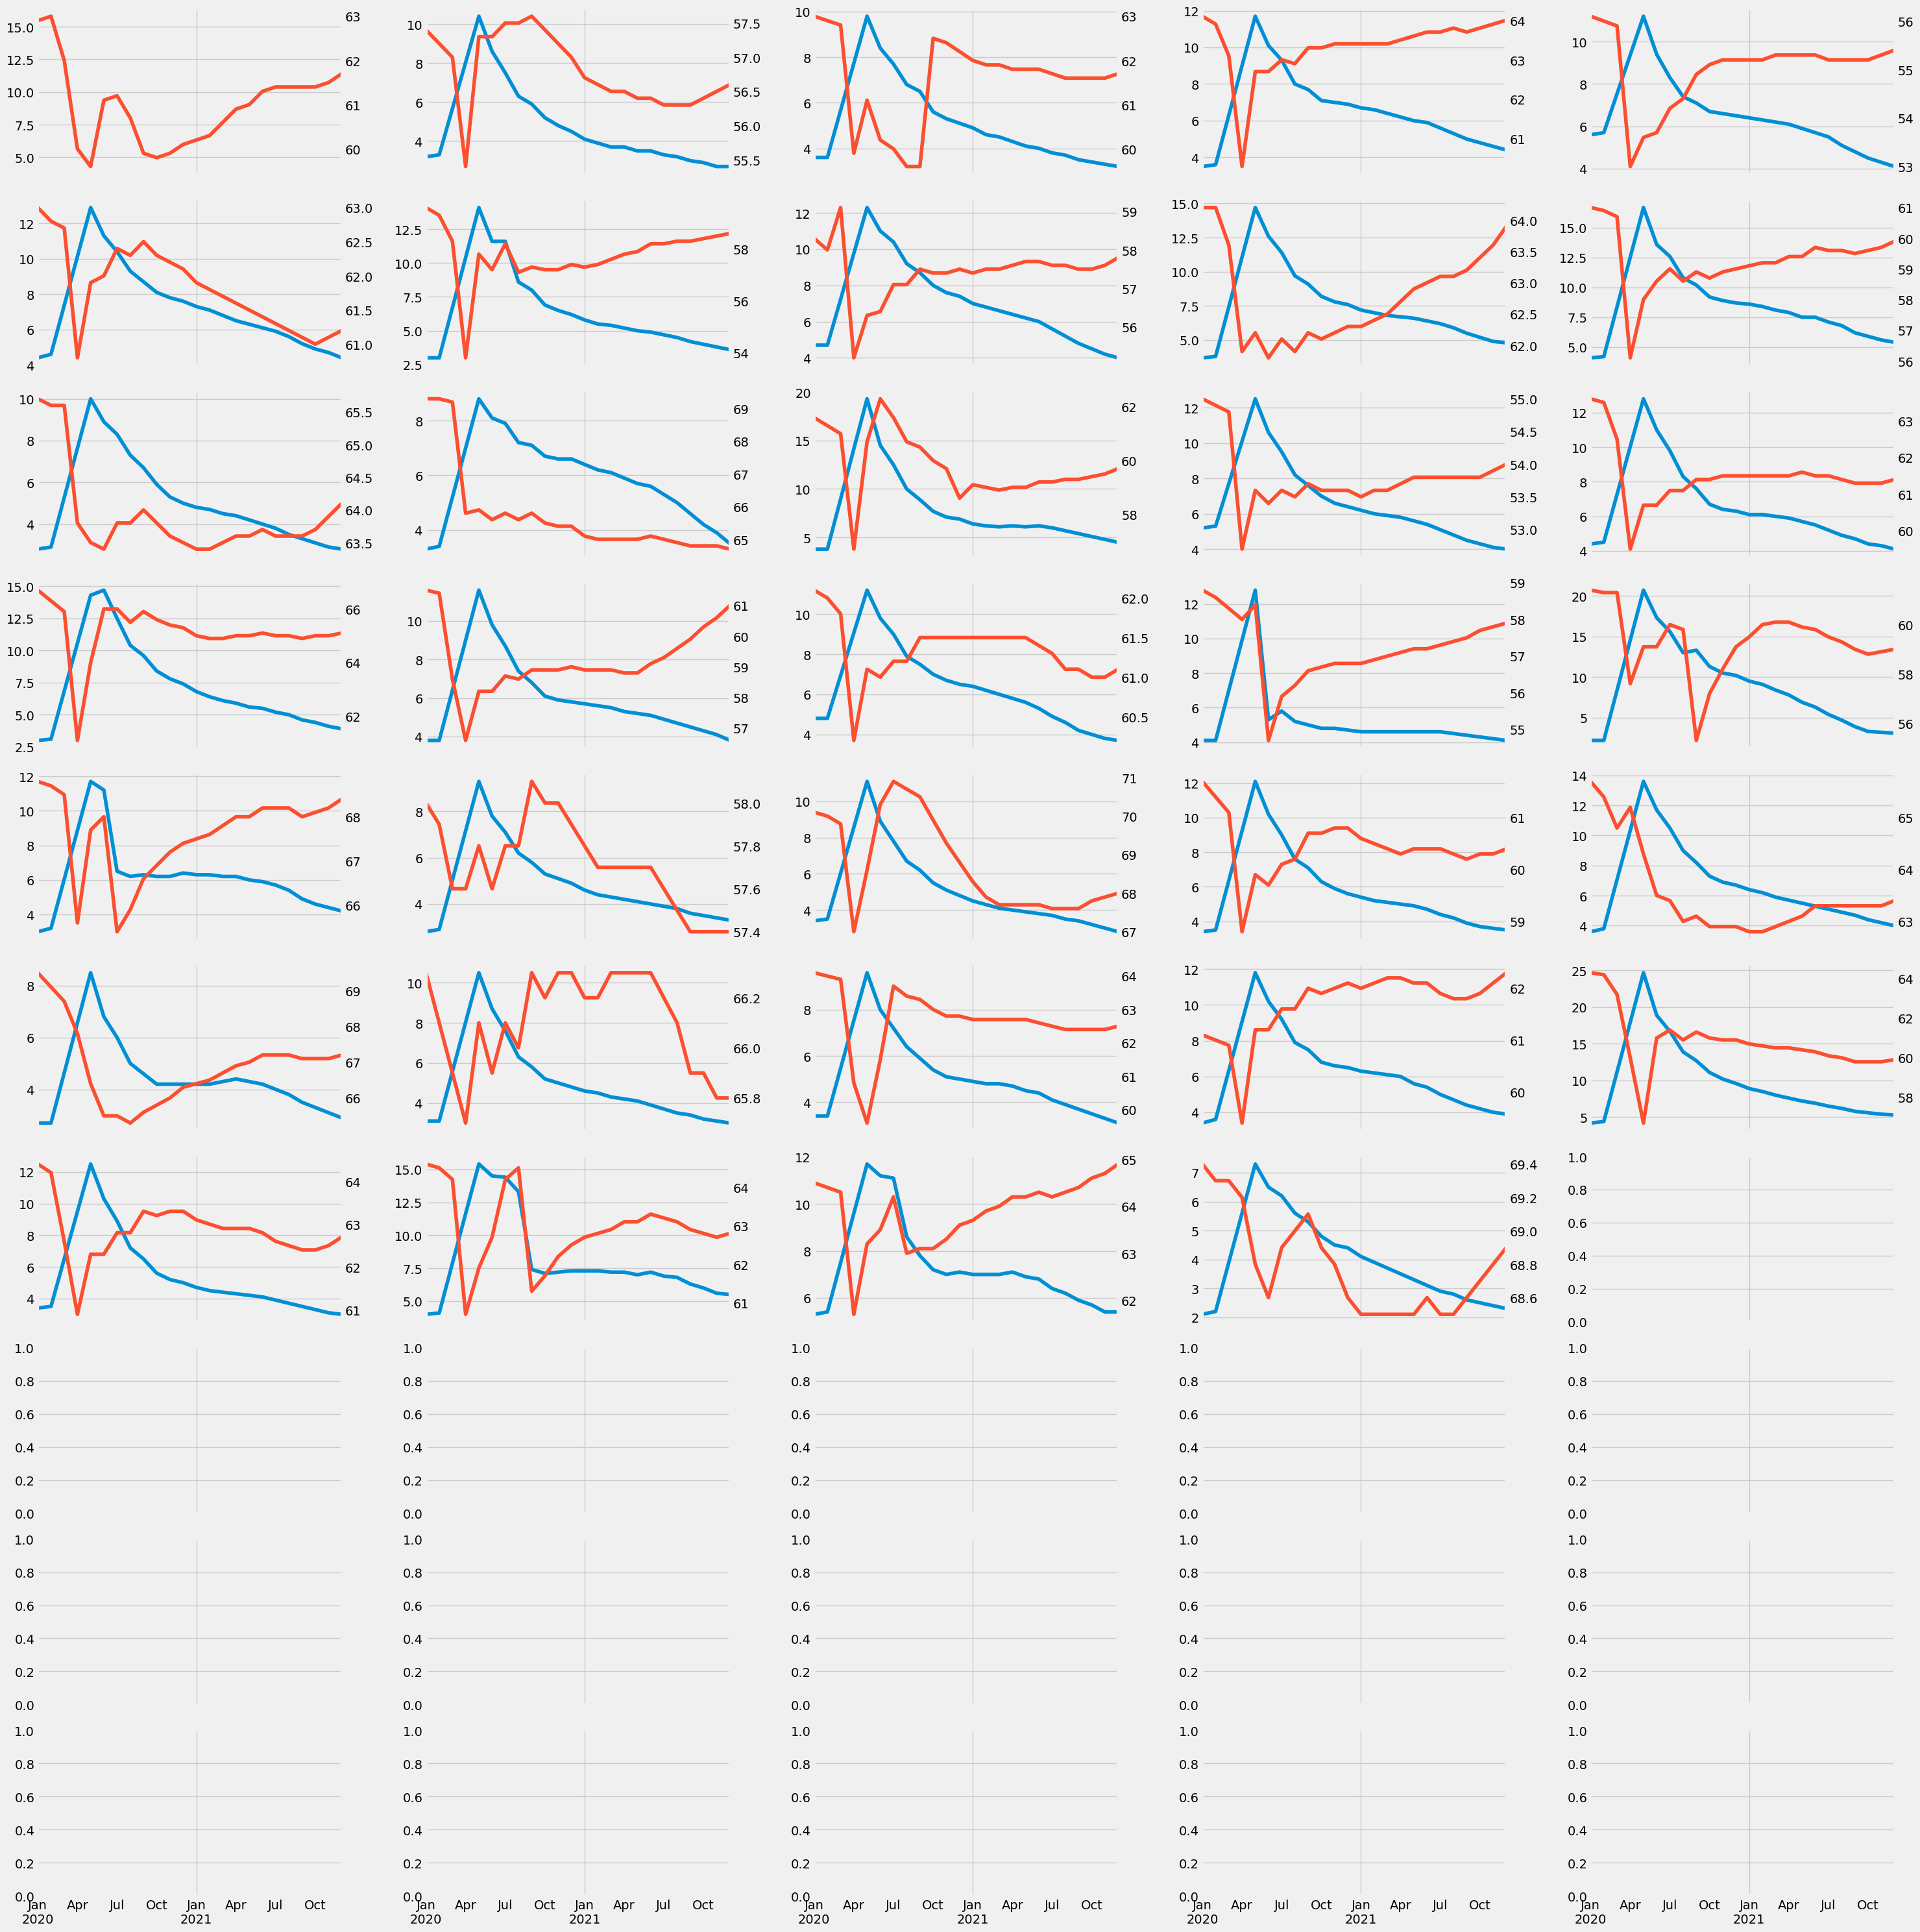

In [53]:
fig, axs = plt.subplots(10, 5, figsize = (30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in part_states.columns:
    if state not in uemp_states.columns:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label = 'Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label = 'Participation', color = color_pal[1])
    ax2.grid(False)
    ax.set_title(state)
    i += 1
plt.tight_layout()
plt.show()